In [1]:
import os
import sys
import csv
import time
import torch
import random
from transformers import AutoTokenizer, AutoModel

import numpy as np
import pandas as pd
from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
max_length = 512

In [13]:
# load a reference set
df = pd.read_csv('../data/ref0_nwords125_clinical_bert_reference_set_AR.txt')
df.head()

,drug,llt_id,llt,class,string
0,ACTEMRA,1198883,systemic juvenile idiopathic arthritis,not_event,systemic juvenile idiopathic arthritis per l a...
1,ACTEMRA,1198923,lithiasis,not_event,lithiasis 3 alt increased 6 4 3 3 1 dizziness ...
2,ACTEMRA,1199508,sjia,not_event,sjia sustained increase in ldl to 4.1 mmol/l (...
3,ACTEMRA,1199508,sjia,not_event,sjia patients weighing less than 30 kg treated...
4,ACTEMRA,1199508,sjia,not_event,sjia platelet count at or less than 50 * 10 3 ...


In [14]:
# load the tokenizer
tokenizer = AutoTokenizer.from_pretrained('../models/Bio_ClinicalBERT/')

In [15]:
counts = list()
for text in tqdm(df.sample(n=10000, random_state=1)['string']):
    tokens = tokenizer(text, padding='max_length', max_length=max_length, truncation=True, return_tensors='pt')
    nwords = len(text.split())
    ntokens = (tokens['input_ids'].numpy()!=0).sum()
    counts.append( (nwords, ntokens) )

100%|██████████| 10000/10000 [00:08<00:00, 1239.92it/s]


(96.0574, 172.4655)

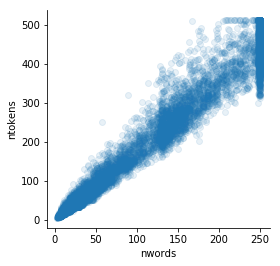

In [16]:

nwords, ntokens = zip(*counts)


plt.figure(figsize=(4,4))
plt.scatter(nwords, ntokens, alpha=0.1)
plt.xlabel('nwords')
plt.ylabel('ntokens')
sns.despine()

np.mean(nwords), np.mean(ntokens)

(1.8262833160313, 1.7664670658682635)

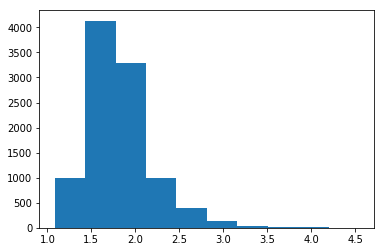

In [17]:
plt.hist(np.array(ntokens)/np.array(nwords))
np.mean(np.array(ntokens)/np.array(nwords)), np.median(np.array(ntokens)/np.array(nwords))

In [18]:
ratios = np.array(ntokens)/np.array(nwords)
np.percentile(ratios, 75)

2.0